In [1]:
%pip install lightgbm

# Load necessary libraries
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('datasets/ObesityDataSet.csv')

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Split features and target variable
X = df.drop(columns=['obese_category'])
y = df['obese_category']

# Apply label encoding to the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Apply one-hot encoding to categorical features if needed
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.1, random_state=42)


In [6]:
import lightgbm as lgb

# Initialize LGBM classifier with verbose=-1 to suppress warnings
lgb_classifier = lgb.LGBMClassifier(random_state=42, verbose=-1)

# Hyperparameter tuning using Grid Search
param_grid = {
    'num_leaves': [20, 30, 40],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(lgb_classifier, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found during grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 30}


In [4]:
# Best parameters found during grid search
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train LGBM classifier with best parameters
lgb_classifier_best = lgb.LGBMClassifier(**best_params, random_state=42, verbose=-1)
lgb_classifier_best.fit(X_train, y_train)

# Predictions on the test set
y_pred = lgb_classifier_best.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: ", balanced_accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 30}


Accuracy:  0.9811320754716981
Balanced Accuracy:  0.9759111855886049
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.92      1.00      0.96        35
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        30
           5       1.00      0.86      0.93        22
           6       0.95      1.00      0.98        21

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



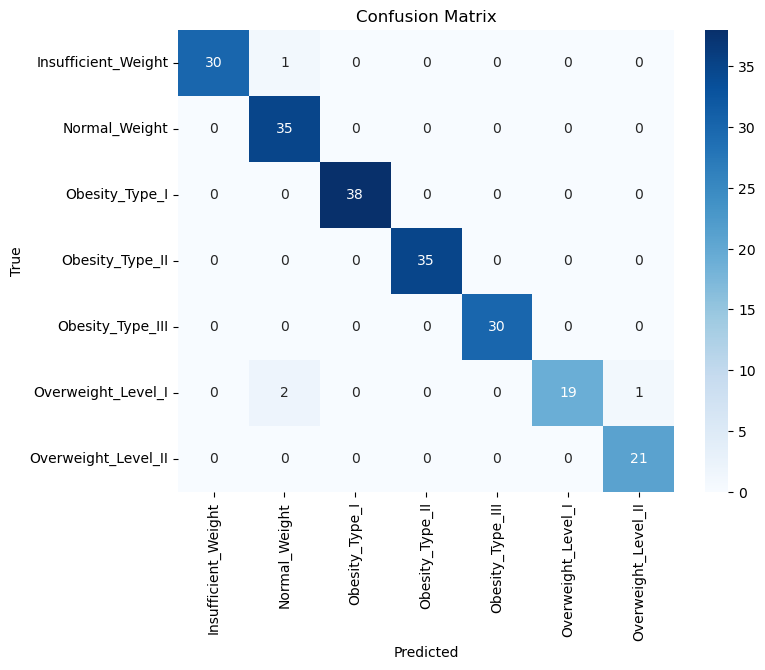

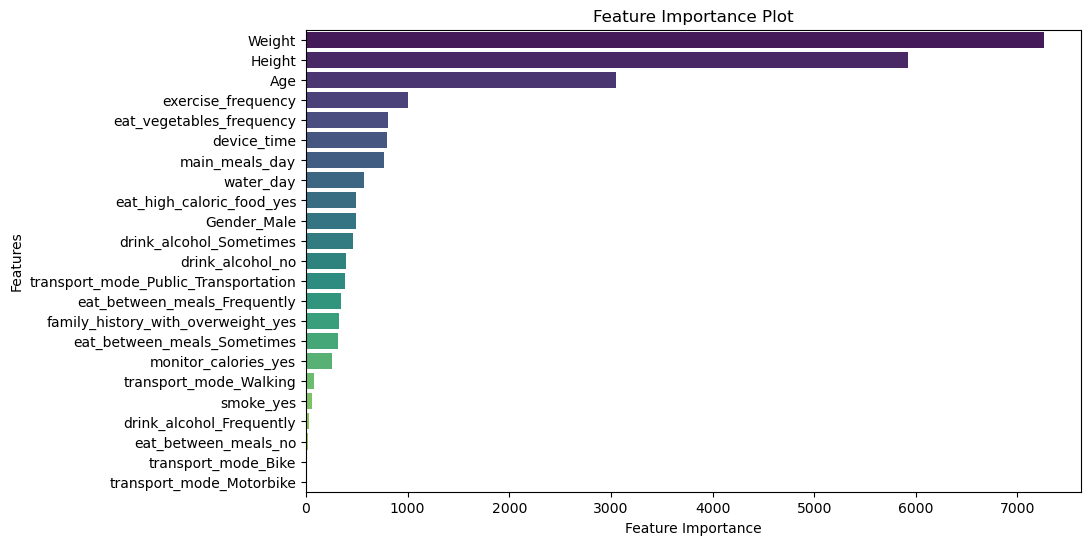

In [5]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature importance analysis
feature_importance = lgb_classifier_best.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=X_encoded.columns[sorted_idx], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()
